## Import Libraries

In [1]:
import pandas as pd                                     # for Data manipulation and analysis

import numpy as np                                      # for arrays and matrices

import matplotlib.pyplot as plt                         # for plot

import seaborn as sns                                   # for plot

from scipy import stats                                 # Scientific computing and technical computing

from sklearn.linear_model import LinearRegression       # linear model

from sklearn.model_selection import train_test_split    # Split

### Loading Data....!!

In [2]:
df = pd.read_csv('C:/Users/ahmed/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# Shape of dataframe (rows, columns)

df.shape

(10841, 13)

In [6]:
# Droping columns which are not useful here

df.drop(df.loc[:,'Last Updated':'Current Ver'],axis=1,inplace=True) 

In [7]:
df.shape

(10841, 11)

### Cleaning Data 

In [8]:
# Check if there is empty or nan value in dataframe

df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Android Ver          3
dtype: int64

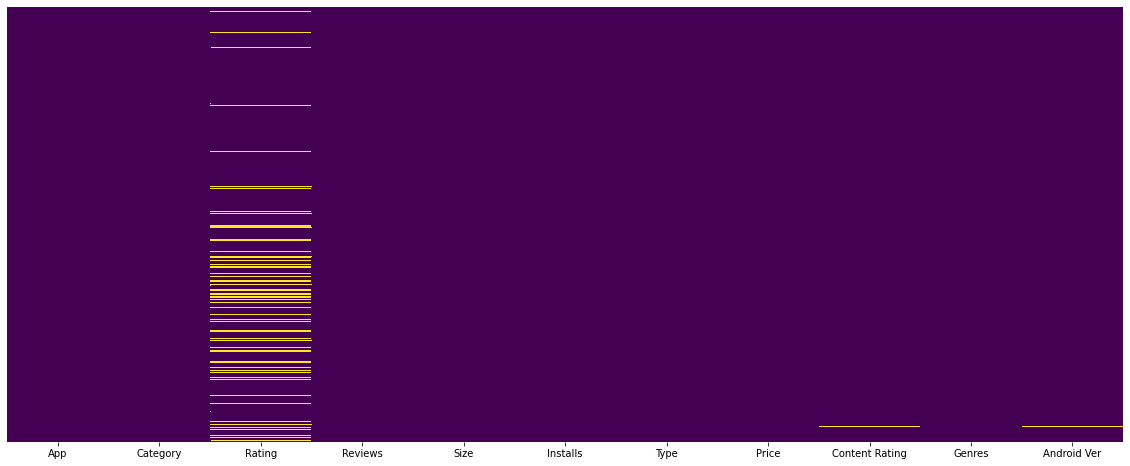

In [9]:
# create figure
plt.figure(figsize=(20,8))

# visualize missing values in dataset
sns.heatmap(data=df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Data is mostly clean, I'll impute Rating with median or mean depending upon nature of distribution and replace NaN in 'Type' with 'Free' as Free is highly frequent.

In [10]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Rating can not be above 5** 

In [11]:
# Check if rating has any value above 5

df.loc[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",NaN


**~ This entry has so many mistakes with it. So, it's better to just drop it**.

In [12]:
# Drop Rating value 19

df.drop(index=10472,inplace=True)

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

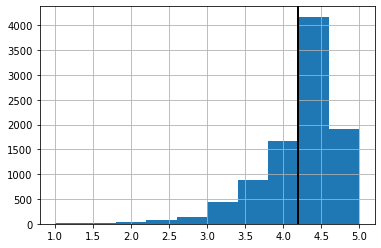

In [13]:
# Distrubition to see whether to impute mean or median
df['Rating'].hist()
plt.axvline(x=df['Rating'].mean(), c='k', linewidth=2)

df['Rating'].describe()

It is better practice to see distribution first before imputing mean or median. In this case, I'll go with median as distrubition is negatively skewed ( left ). Mean isn't the right representation of the column.

In [14]:
# Impute Rating variable with median
rating_median = df['Rating'].median()
df['Rating'].replace(np.nan,rating_median,inplace=True)

# Replace nan from Type variable
df['Type'].replace(np.nan,'Free',inplace=True)

In [15]:
# Check mode 'Android Ver'

df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

In [16]:
# Replace NaN with Most frequent
df['Android Ver'].replace(np.nan,'4.1 and up',inplace=True)

#### Renaming Columns 

In [17]:
# Change size to size megabyte(MB) and Price to Price in dollars

df.rename(columns ={'Size':'Size(MB)','Price':'Price($)'},inplace=True)                

#### I'll fix some columns for future purposes

In [18]:
# Replace '+' and ',' to '' Installs
df['Installs']= df['Installs'].apply(lambda x: x.replace('+','').replace(',',''))

# Remove 'M' and 'k' from Size
df['Size(MB)']= df['Size(MB)'].apply(lambda x: x.replace('M','').replace('k',''))

# Remove '$' from Price
df['Price($)'] = df['Price($)'].apply(lambda x: x.replace('$', ''))

# Remove 'W' from Android Ver
df['Android Ver'] = df['Android Ver'].apply(lambda x: x.replace('W',''))

# Covert Genres to primary Genres
df['Genres'] = df['Genres'].apply(lambda x: x.split(',')[0].split(';')[0])

#### For better understanding of our data, I'll add new column with name of Android Versions

In [19]:
# replace android ver with android ver name
replace_values = {'4.4 and up':'kitkat','4.1 and up':'jelly bean','4.0.3 and up':'ice cream sandwich','4.0 and up':'ice cream sandwich','4.4 and up ':'kitkat','2.3 and up':'gingerbread','5.0 and up':'lollipop','4.2 and up':'jellybean','2.3.3 and up':'gingerbread','2.2 and up':'froyo','4.3 and up':'jelly bean','3.0 and up':'honeycomb','2.1 and up':'eclair','1.6 and up':'donut','6.0 and up':'marshmallow','7.0 and up':'nougat','3.2 and up':'honeycomb','2.0 and up':'eclair','5.1 and up':'lollipop','1.5 and up':'cupcake','3.1 and up':'honeycomb','2.0.1 and up':'eclair','8.0 and up':'orea','7.1 and up':'nougat','4.0.3 - 7.1.1':'nougat','5.0 - 8.0':'orea','1.0 and up':'Astro Boy','4.1 - 7.1.1':'nougat','5.0 - 6.0':'marshmallow','2.2 - 7.1.1':'nougat','7.0 - 7.1.1':'nougat','5.0 - 7.1.1':'nougat'}
df['Android Name'] = df['Android Ver'].replace(replace_values)

df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Android Ver,Android Name
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,4.0.3 and up,ice cream sandwich
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design,4.0.3 and up,ice cream sandwich
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,4.0.3 and up,ice cream sandwich
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,4.2 and up,jellybean
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design,4.4 and up,kitkat


- Remove 'Varies with device' from Android Name and replace it with mode which is ice cream sandwich

In [20]:
# Most frequent value which we will impute
df.loc[df['Android Name']!='Varies with device']['Android Name'].describe()

count                   9478
unique                    15
top       ice cream sandwich
freq                    2876
Name: Android Name, dtype: object

In [21]:
# Replacing Varies with device with mode
df['Android Name'] = df['Android Name'].apply(lambda x: x.replace('Varies with device','ice cream sandwich'))

In [22]:
df['Android Name'].value_counts()

ice cream sandwich    4238
jelly bean            2696
kitkat                 992
gingerbread            933
lollipop               625
jellybean              394
honeycomb              287
froyo                  244
eclair                 173
donut                  116
marshmallow             61
nougat                  51
cupcake                 20
orea                     8
Astro Boy                2
Name: Android Name, dtype: int64

- Size(MB) has Varies with device values and we need to deal with it too

In [23]:
# Value count of Size(MB) to count number of Varies with device

df['Size(MB)'].value_counts().sort_values(ascending=False)

Varies with device    1695
11                     199
12                     196
14                     195
13                     191
                      ... 
193                      1
601                      1
818                      1
713                      1
986                      1
Name: Size(MB), Length: 422, dtype: int64

- Since, Size(MB) has string. It's not possible to understand whether to impute with mean or median. However, I can split Size(MB) column;

1) With string ( Varies with device ) in it  2) Without String ( Varies with device ). This way I'll get all the information of this column using describe or histogram.

c:\python\python38\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


count    10840.000000
mean        33.589862
std         91.166381
min          1.000000
25%          6.800000
50%         15.000000
75%         28.000000
max       1020.000000
Name: Size(MB), dtype: float64

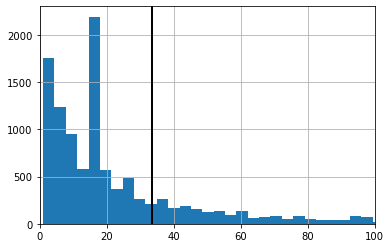

In [77]:
# Plot Histogram to better understand Size(MB)
plt.hist(df.loc[df['Size(MB)']!='Varies with device']['Size(MB)'].astype(float),bins=300)
plt.xlim(0,100)
plt.axvline(x=df['Size(MB)'].mean(), c='k', linewidth=2)
plt.grid()

# Describe which further confirms to impute Size(MB) with Median
df.loc[df['Size(MB)']!='Varies with device']['Size(MB)'].astype(float).describe()

~Size(MB) : 15% rows are filled with 'varies with devic' but Since, it is not more than 50%, I will impute it with median.

In [25]:
# Imputing Size(MB) with Size(MB) median

size_median_num = df.loc[df['Size(MB)']!='Varies with device']['Size(MB)'].median()
size_median_num
df['Size(MB)']= df['Size(MB)'].replace('Varies with device',15)

### Data is clean now!!

In [26]:
# Check again

df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size(MB)          0
Installs          0
Type              0
Price($)          0
Content Rating    0
Genres            0
Android Ver       0
Android Name      0
dtype: int64

## Correct Data Types

In [27]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size(MB)           object
Installs           object
Type               object
Price($)           object
Content Rating     object
Genres             object
Android Ver        object
Android Name       object
dtype: object

In [28]:
# Reviews datatype from object to integer
df['Reviews'] = pd.to_numeric(df['Reviews'],downcast='integer')

# Size datatype from Object to flaot
df['Size(MB)'] = pd.to_numeric(df['Size(MB)'])

# Price datatype from object to float
df['Price($)'] = pd.to_numeric(df['Price($)'])

# Installs datatype from object to integer
df['Installs'] = pd.to_numeric(df['Installs'],downcast='integer')

In [29]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size(MB)          float64
Installs            int32
Type               object
Price($)          float64
Content Rating     object
Genres             object
Android Ver        object
Android Name       object
dtype: object

#### Create New Feature 'Total Sales' of Application

In [30]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Android Ver,Android Name
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up,ice cream sandwich
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,4.0.3 and up,ice cream sandwich
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up,ice cream sandwich
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up,jellybean
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,4.4 and up,kitkat


In [31]:
# How much sales each app has made

df['Total Sales($)'] = df['Installs'] * df['Price($)']

# drop Android Ver
df.drop('Android Ver',axis=1,inplace=True)

In [32]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Android Name,Total Sales($)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,ice cream sandwich,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,ice cream sandwich,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,ice cream sandwich,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,jellybean,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,kitkat,0.0


## EDA

Text(0.5, 1.0, 'Distribution of Rating')

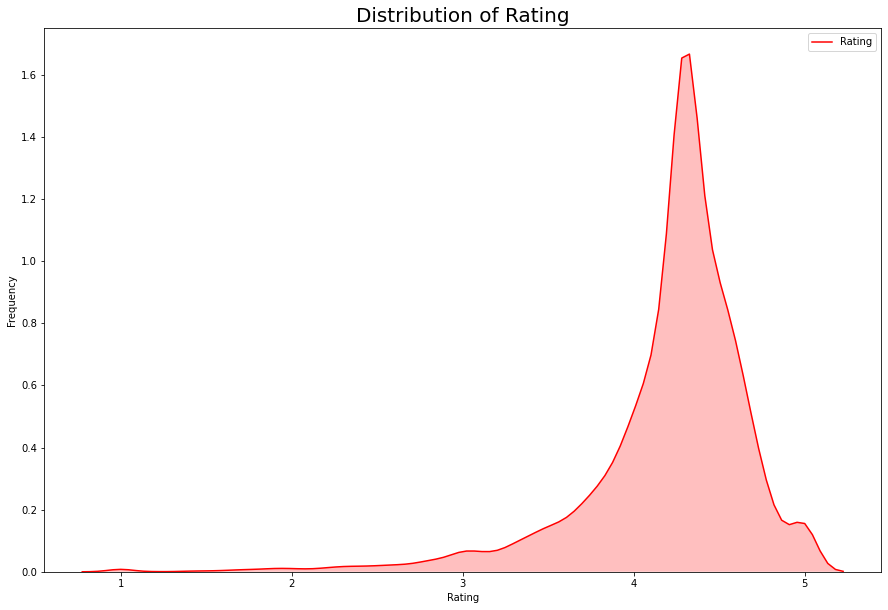

In [33]:
# Rating Distribution

fig = plt.figure(figsize=(15,10))
g = sns.kdeplot(df.Rating, color="Red", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

**Findings** :

Average of rating of application in store is around 4 which is very high


<ipython-input-34-218fa9e27194>:20: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


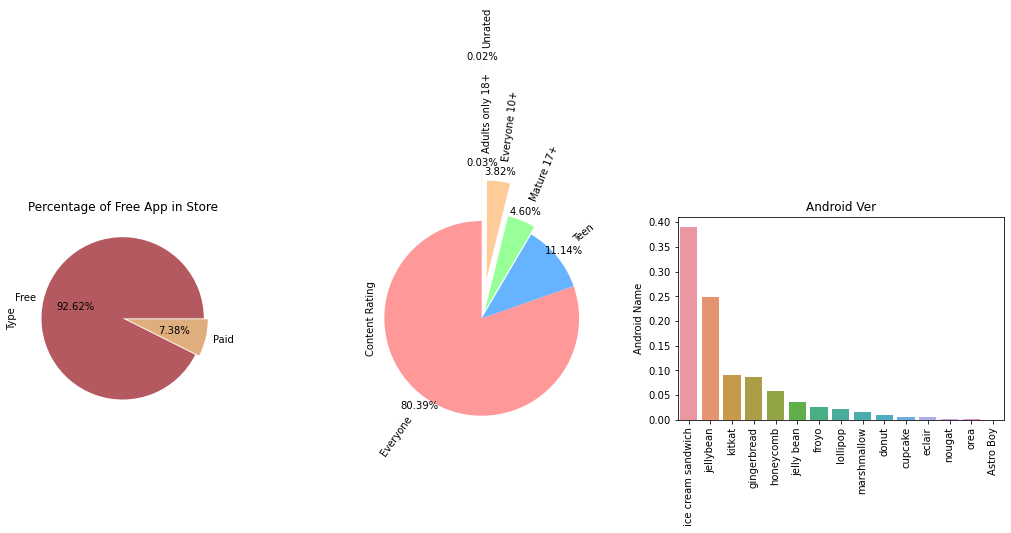

In [34]:
fig = plt.figure(figsize=(15,10),constrained_layout=True)

# I'll use barplot instead of countplot because I want to see percentile
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']         
explode = (0, 0, 0.1, 0.5,0.6,1.9) 
explode1 = (0, 0, 0.1, 0.5,0.5,0.5,0,0,0,0,0,0,0,0,0)  

# Pie Chart of 'type'
plt.subplot2grid((2,3),(0,0))
# sns.barplot(df['Type'].unique(),df['Type'].value_counts(normalize=True))
df['Type'].value_counts().plot(kind='pie',colors=('#b3595f','#deae7e'),autopct='%1.2f%%',explode=(0,0.05))
plt.title('Percentage of Free App in Store')


# Pie Chart of 'Content Rating'
plt.subplot2grid((2,3),(0,1))
# sns.barplot(df['Content Rating'].unique(),df['Content Rating'].value_counts(normalize=True))
# plt.xticks(rotation=90)
df['Content Rating'].value_counts().plot(kind='pie',colors=('#ff9999','#66b3ff','#99ff99','#ffcc99'),autopct='%1.2f%%',explode=explode,startangle=90,pctdistance=1.1,radius=1.2, labeldistance=1.2,rotatelabels=True)
plt.tight_layout()


# Barplot of 'Android Name'
plt.subplot2grid((2,3),(0,2))
sns.barplot(df['Android Name'].unique(),df['Android Name'].value_counts(normalize=True))
plt.xticks(rotation=90)
plt.title('Android Ver')


plt.show()

- Android’s biggest strength is its app ecosystem. There are a digital ton of Android apps. People downloaded them billions of times. Some of them cost money and some of them don’t. Usually, the best apps will cost you a few bucks. However, there are 92.62% apps in our dataset that you can use for free without paying a dime. 


- Content ratings are used to inform consumers, especially parents, of potentially objectionable content that exists within an app. Roughly all apps are made for all maturity level people. Targeting people only from one age group doesn't seem to be right idea. It seems the right approach too.


- Many android version came after Ice Cream Sandwich but around 40% apps was released for ice cream sandwich which tells us that most of the apps developers tend to go for this version specifically due to reasons i'll try to answers in later visualization.

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

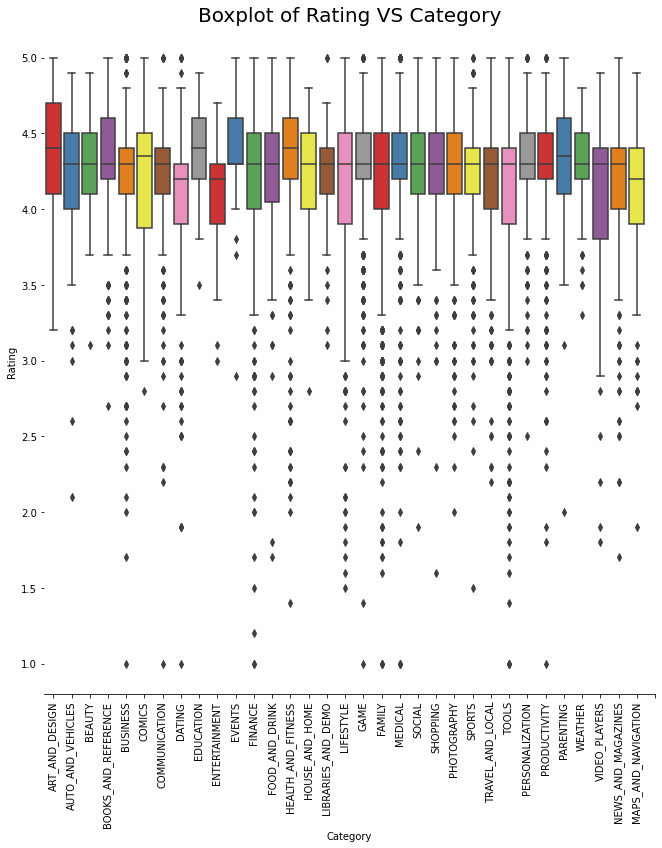

In [35]:
g = sns.catplot(x="Category",y="Rating",data=df, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

**Findings** :

Rating of application in each category is not different too much 


Text(0.5, 1.0, 'Distribution of Reveiw')

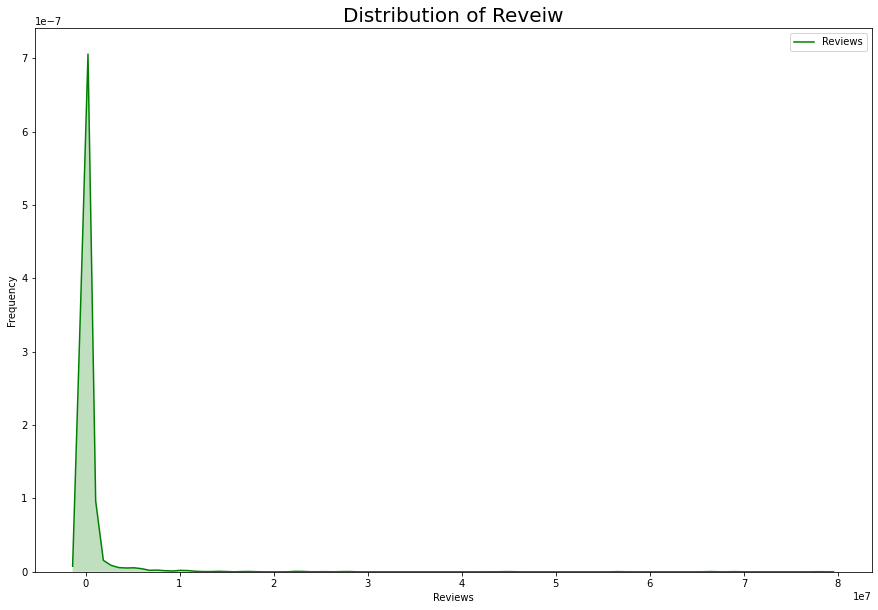

In [36]:
# Reviews Distribution

fig = plt.figure(figsize=(15,10))

g = sns.kdeplot(df.Reviews, color="Green", shade = True)
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")
plt.title('Distribution of Reveiw',size = 20)

**Findings**:
    
Only few apps have reviews

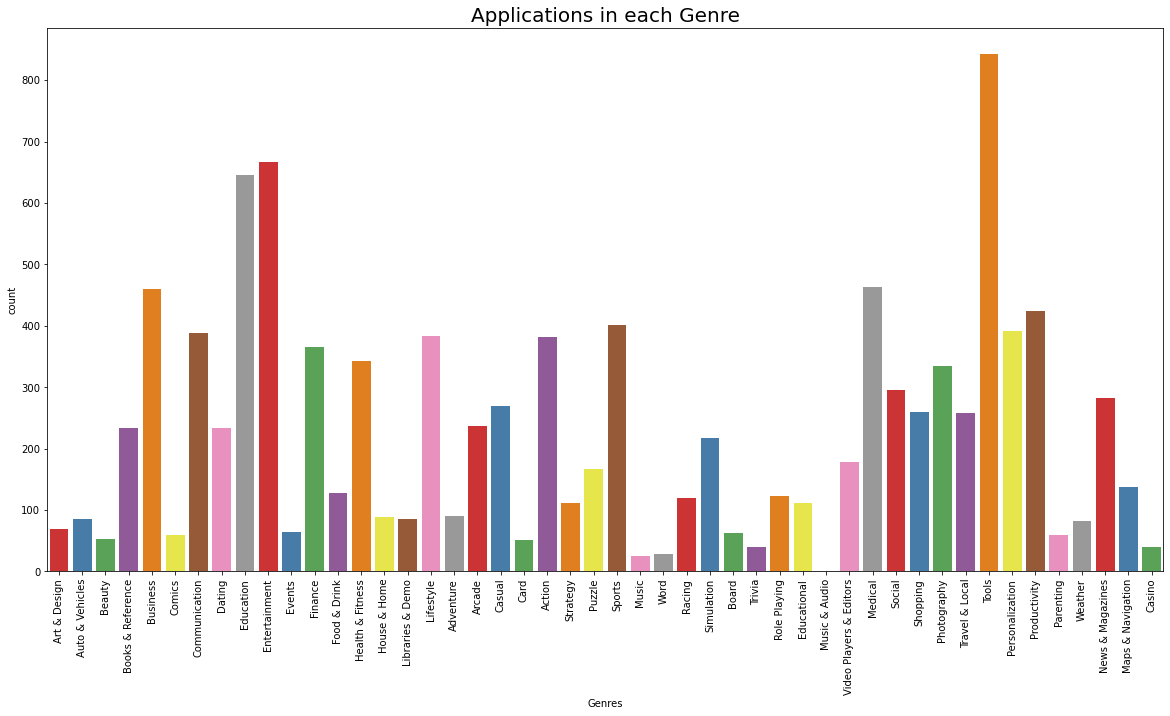

In [67]:
fig = plt.figure(figsize=(20,10))

sns.countplot(x='Genres',data=df,palette='Set1') 
plt.xticks(rotation=90)
plt.title('Applications in each Genre',size=20)
plt.show()

**Findings**:

- Surprisingly, GooglePlayStore has most apps in Tools Genre. It is probably because googleplaystore doesn't include all sub game genre in one game genre. It that was the case Game would have been highest genre. Let's actually see if my hypothesis is true.

#### What if we combine all sub game genre to one game genre

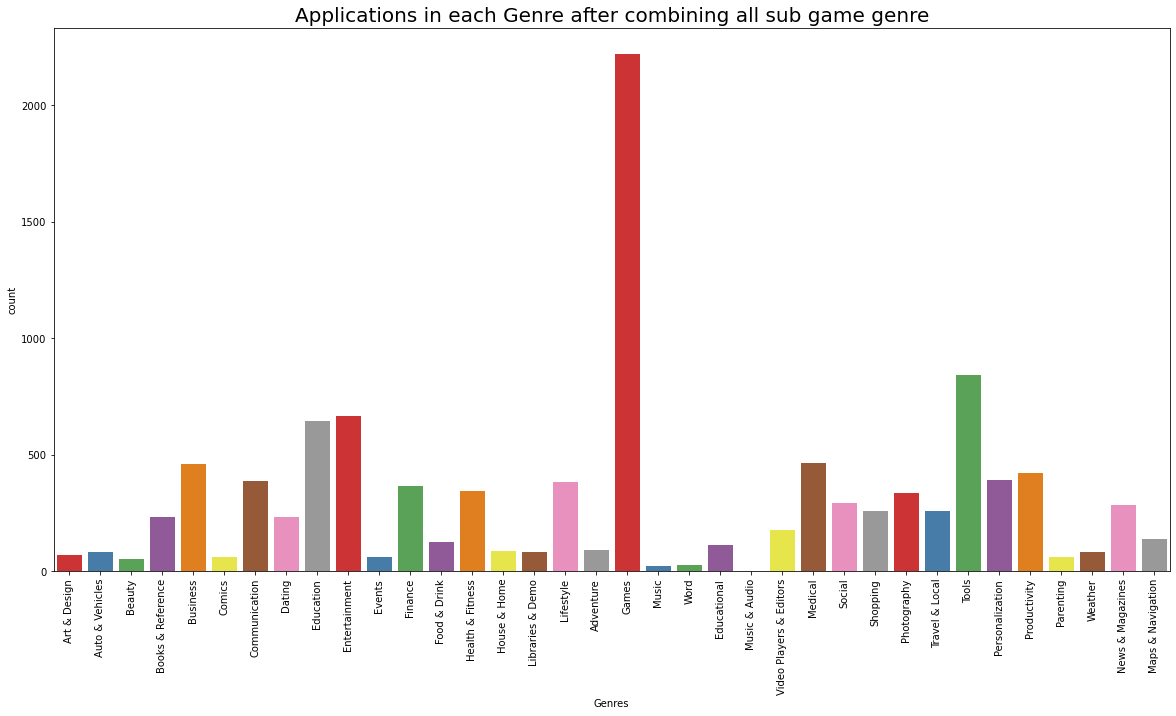

In [68]:
# Combining all sub game genre to one genre (i.e Game) 
game_genre_df = df.replace(dict.fromkeys(['Arcade','Card','Action','Strategy','Puzzle','Sports','Racing','Simulation','Board','Role Playing','Casino','Trivia','Casual'], 'Games'))

fig = plt.figure(figsize=(20,10))

sns.countplot(x='Genres',data=game_genre_df,palette='Set1') 
plt.xticks(rotation=90)
plt.title('Applications in each Genre after combining all sub game genre',size=20)
plt.show()

**Findings**:

As expected, there is no comparision between game and other genre in our dataset if we combine all our sub game genre to one game genre but for now I'll use former. It is more accurate. If we wanted simple analysis of Genre we could use Games only.

In [39]:
df.head()

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price($),Content Rating,Genres,Android Name,Total Sales($)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,ice cream sandwich,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,ice cream sandwich,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,ice cream sandwich,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,jellybean,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,kitkat,0.0


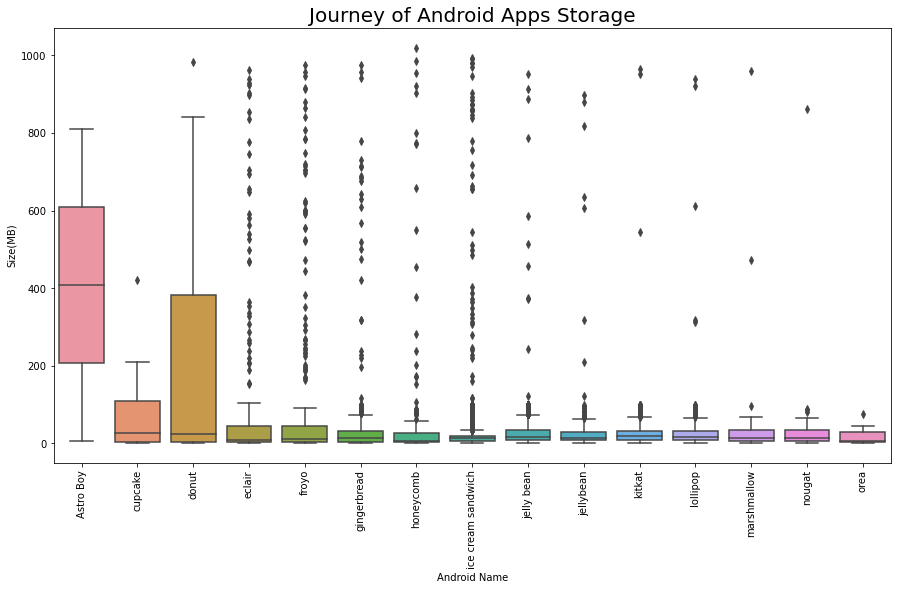

In [40]:
fig = plt.figure(figsize=(15,8))

# df.sort_values()

sns.boxplot(x = 'Android Name', y ='Size(MB)', data = df.sort_values(('Android Name'),ascending=True))
plt.xticks(rotation=90)
plt.title('Journey of Android Apps Storage',size=20)

plt.show()

**Findings**:

Early versions of android consumed more storage as compare to recent versions. This is remarkable acheivement in the field as storage consumptions is one of the critical problem of any app.

c:\python\python38\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Size(MB) vs Rating')

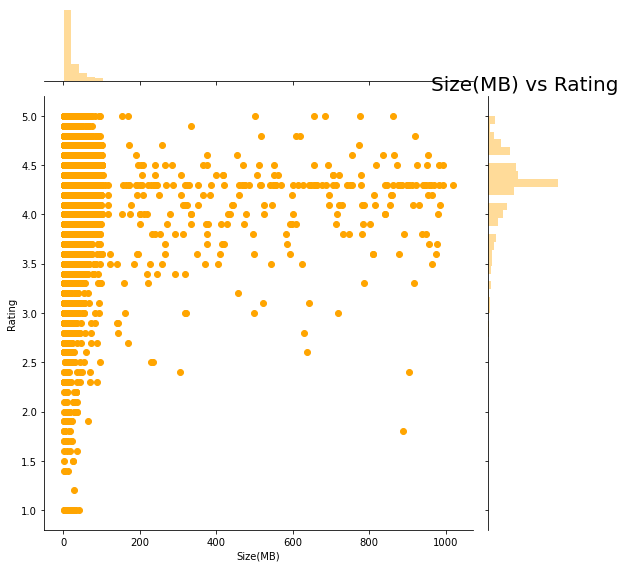

In [69]:
g = sns.jointplot(x="Size(MB)", y="Rating",color = 'orange', data=df,size = 8)

plt.title('Size(MB) vs Rating',size=20)

Text(0.5, 1.0, 'RegPlot Rating VS Installs')

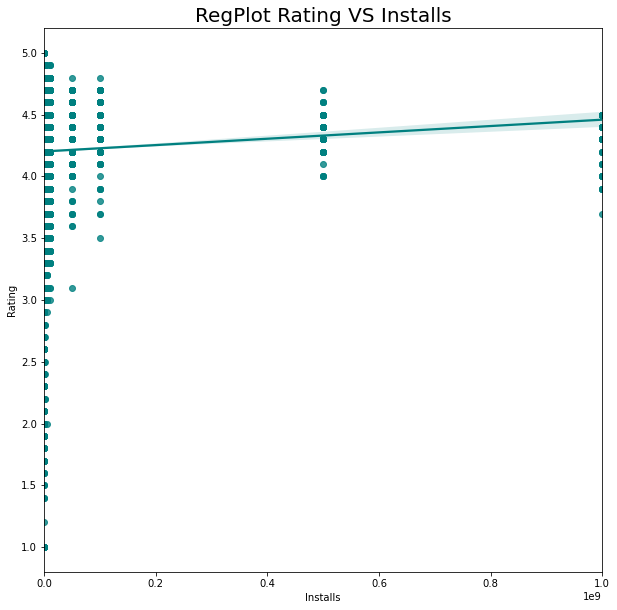

In [42]:
plt.figure(figsize=(10,10))
sns.regplot(x='Installs',y='Rating',data=df,color='teal')
plt.title('RegPlot Rating VS Installs',size=20)

**Findings**:
    
Regression Plot predicts relationship between two variable (i.e how change in one variable relates to change in another). In this case, We have neither Positive nor Negative relationship between Rating and Installs. Which also suggest Installs is not a good predictor of Rating. For further analysis I'll use corr() function to demonstrate it.

In [48]:
df[['Installs','Rating']].corr()

,Installs,Rating
Installs,1.000000,0.045496
Rating,0.045496,1.000000


Where:  

0 = no relationship

+1 = Positive linear relationship

-1 = Negative linear relationship

Text(0.5, 1.0, 'Regplot Rating VS Price')

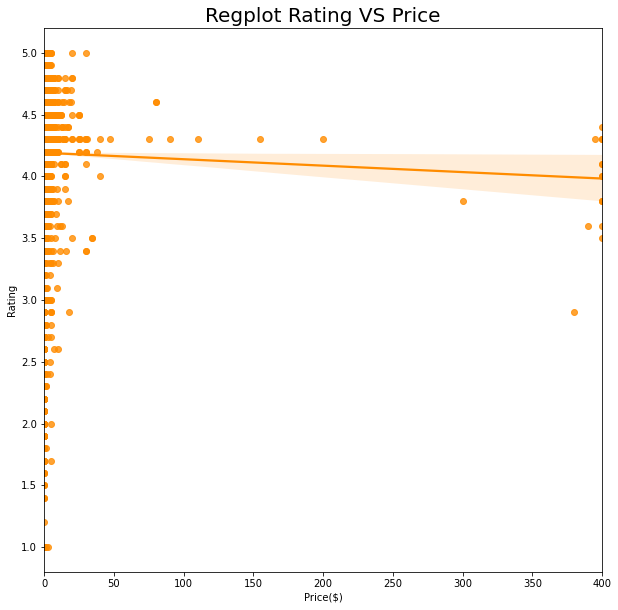

In [43]:
plt.figure(figsize = (10,10))
sns.regplot(x="Price($)", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Regplot Rating VS Price',size = 20)

**Findings**:

Same as before, Price is not a good predictor of Rating. For further demonstration. I'll use corr() function.

In [50]:
df[['Price($)','Rating']].corr()

,Price($),Rating
Price($),1.000000,-0.019318
Rating,-0.019318,1.000000


### Most Popular Genre and Category

c:\python\python38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Calling figure.constrained_layout, but figure not setup to do constrained layout.  You either called GridSpec without the fig keyword, you are using plt.subplot, or you need to call figure or subplots with the constrained_layout=True kwarg.
  fig.canvas.print_figure(bytes_io, **kw)


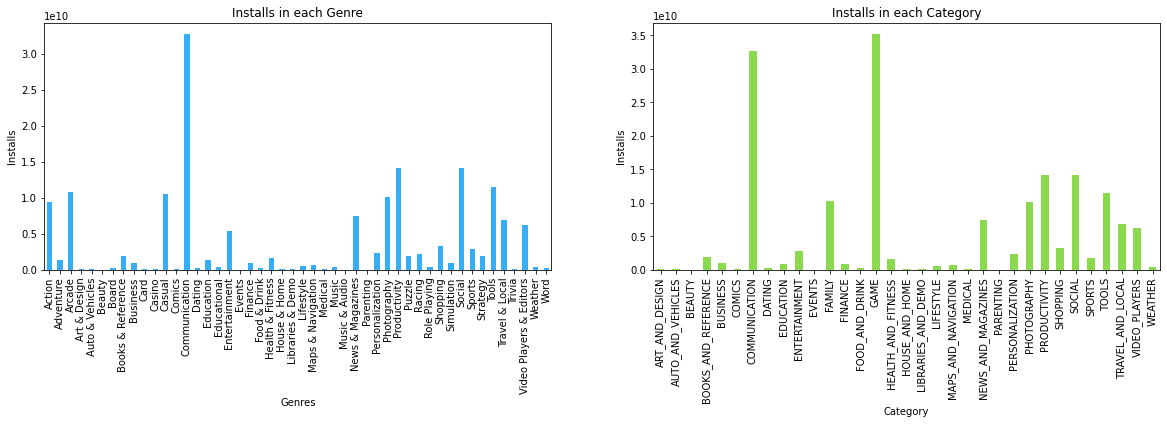

In [76]:
fig= plt.figure(figsize=(20,10),constrained_layout=True)

plt.subplot2grid((2,2),(0,0))
df.groupby('Genres')['Installs'].sum().plot(kind='bar',color='#36adf7')

#     sns.catplot(x='x',y='Installs',kind='bar',data=df,size=10)
plt.ylabel('Installs')
plt.title('Installs in each Genre')
plt.xticks(rotation=90)


plt.subplot2grid((2,2),(0,1))
df.groupby('Category')['Installs'].sum().plot(kind='bar',color='#8ad94e')

plt.title('Installs in each Category')
plt.ylabel('Installs')


plt.show()

**Findings**:

-  Communication is the most Installed Genre


-  Game has been download most of the time

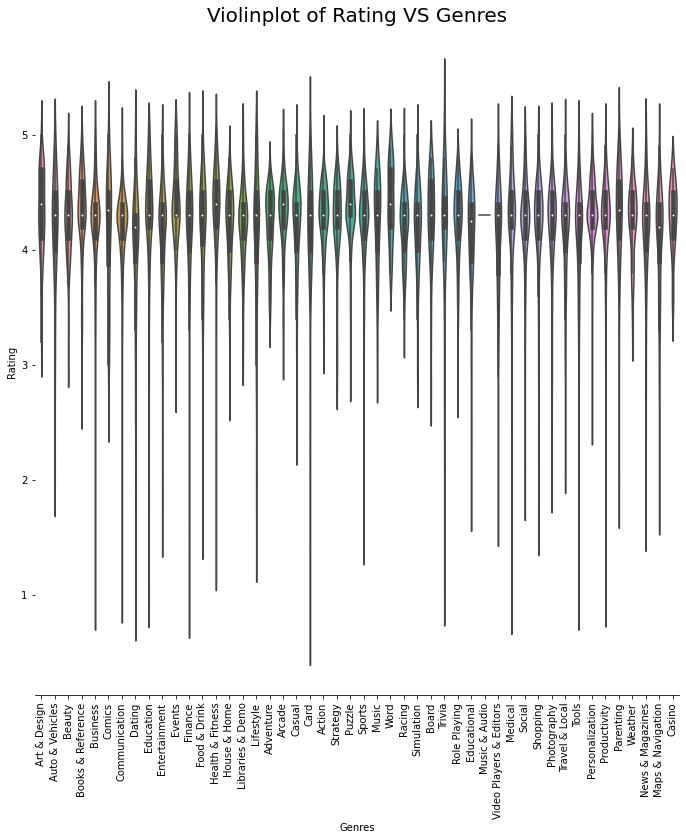

In [45]:
g = sns.catplot(x='Genres',y='Rating',kind='violin',data=df,height=10)
g.despine(left=True)
g.set_xticklabels(rotation=90)

g = g.set_ylabels("Rating")
plt.title('Violinplot of Rating VS Genres',size = 20)

plt.show()

**Findings** :

Apps with different Genre almost have same rating